#### Nama : Yusdiansya Putra
#### NIM    : 09011381823078
#### Kelas : SK5A

# IMAGE PROCESSING

## Modul yang dibutuhkan

In [ ]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
import bm3d
from skimage import io, img_as_float
from layeris.layer_image import LayerImage
%matplotlib inline

# Pengelanan Citra Digital
    Citra digital adalah Citra yang dapat diolah oleh komputer
    pada dasarnya citra yang ada terdiri dari pixel pixel yang merepresentasikan warna - warna yang ada
    contoh dari jenis citra digital yang berdasarkan warna adalah Grayscale dan Citra RGB
    Citra Grayscale adalah Citra yang memiliki 1 Channel warna dengan rentang 0 - 255
    Citra RGB adalah citra yang memiliki 3 Channel Warna Yaitu Red Green Blue
    
# Pengenalan Pemrosesan Citra
    Pemrosesan citra yang biasanya berkaitan dengan bagaimana citra tersebut diolah, dan dianalisis sehingga menghasilkan informasi yang dapat dipahami oleh manusia.
    
    
# Pemrosesan citra medis 
    adalah sebuah teknik dan proses pengolahan visual dari bagian dalam tubuh untuk keperluan analisis klinis, intervensi medis, atau fisiologi. Pencitraan medis ini dalam kata lain merupakan representasi dari bagaimana cara mengungkapkan jaringan dan struktur internal yang ada di dalam tubuh yang disembunyikan didalam kulit dan tulang, serta mengetahui dan mendiagnosa jika ada penyakit yang ada di dalam tubuh orang tersebut.

## Perlakuan Umum Pemrosesan Citra


### Denoising & Image Enhancement
    Gambar yang dihasilkan dari Ultrasonography (USG) biasanya memiliki noise yang cukup banyak sehingga ada beberapa kasus dimana gambar sangat susah dibaca jika dimasukkan kedalam mesin, sehingga dilakukan denoising terlebih dahulu

# Contoh Kasus 
## Proses Penghilangan Noise Dari Citra Jantung Dewasa

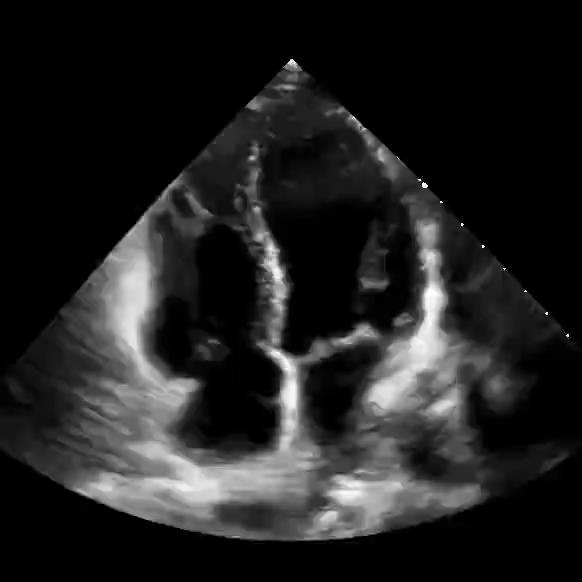

### LOAD DATASET

In [2]:
root_path_testing = 'before/*.jpg' ## di path mana gambar akan di blend
root_path_saving = 'after/'  ## dimana gambar akan disave
file_path = glob.glob(root_path_testing)

#### Fixed Thresholding

In [3]:
for path in file_path:
    img=cv2.imread(path)
    img_th2, img_th1= cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,img_th1)

<center><h4>Hasil Denoising Fixed Tresholding</h4></center>

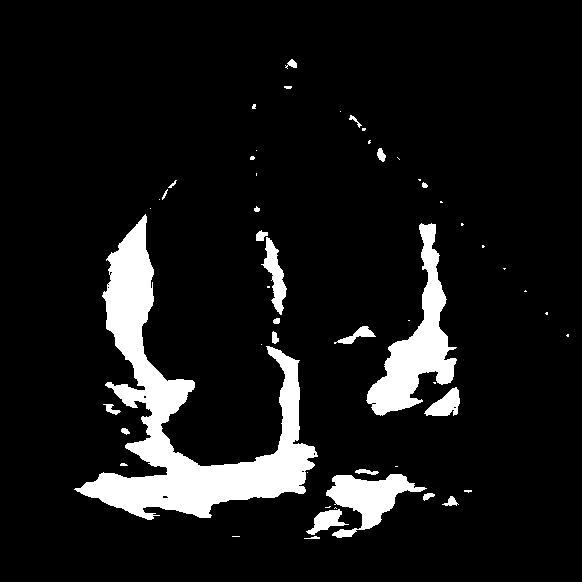

<h4>Hasil Denoising Filter 2D</h4>

In [4]:
for path in file_path:
    img=cv2.imread(path)
    kernel = np.ones((3,3),np.float32)/9
    filt_2D = cv2.filter2D(img, - 1,kernel)

    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,filt_2D)

<center><h4>Hasil Denoising Filter 2D</h4></center>

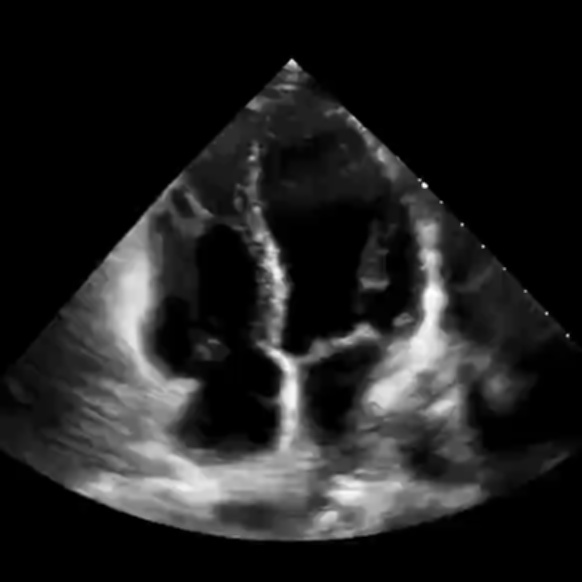

#### Denoising Blur

In [5]:
for path in file_path:
    img=cv2.imread(path)
    kernel = np.ones((3,3),np.float32)/9
    blur = cv2.blur(img,(3,3))
    # split filename
    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename,blur)

<center><h4>Hasil Denoising Blur</h4></center>

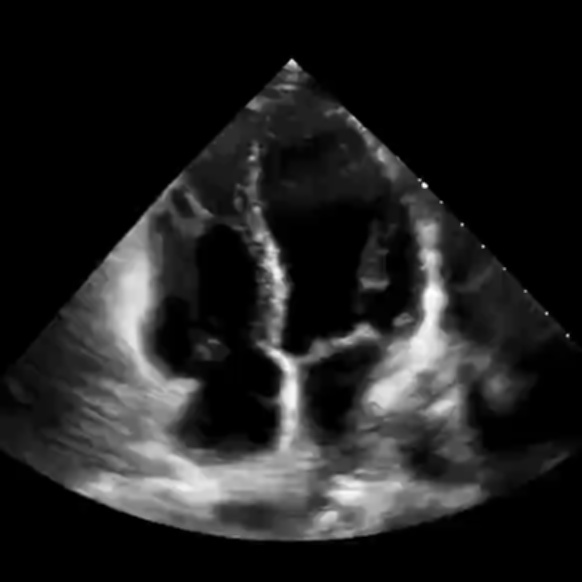

#### CLAHE

In [6]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))
for path in file_path:
    image = cv2.imread(path, 0)
    image_equ = clahe.apply(image)
    
    # split filename
    filename = path.split('\\')[-1]
    cv2.imwrite(root_path_saving + filename, image_equ)

Hasil CLAHE
![after/Clahe.jpg](after/Clahe.jpg)

#### Histogram Equalization

In [7]:
for path in file_path:
    img = cv2.imread(path,0) ## grayscale 
    equ = cv2.equalizeHist(img)
    
    ##save
    filename = path.split("\\")[-1]
    cv2.imwrite(root_path_saving + filename ,equ)

Hasil Histogram Equalization
![HE.jpg](after/HE.jpg)

#### Block & Matching 3D

In [8]:
for path in file_path:
    img = img_as_float(io.imread(path,as_gray= True))
    BM3D_denoised_image = bm3d.bm3d(img, sigma_psd=127/255, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
    #BM3D_denoised_image = bm3d.bm3d(img, sigma_psd=.2, stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)
    filename = path.split('\\')[-1]
    plt.imsave(root_path_saving + filename,BM3D_denoised_image,cmap='gray')

Hasil BM3D
![BM3D.jpg](after/BM3D.jpg)

### segmentasi

In [9]:
for path1 in file_path:    
    image_gambar = cv2.imread(path1)
    gray = cv2.cvtColor(image_gambar, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    ret, result = cv2.connectedComponents(thresh)
    idx = 0
   
    background = np.zeros(thresh.shape, np.uint8)
    for res in np.unique(result):
        if res == 0:
            continue
    
        temp_obj = np.zeros(thresh.shape, np.uint8)
        temp_obj[result ==res] = 255

        background = cv2.add(background, temp_obj)

    conturs, hierarchy = cv2.findContours(background, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for idx_contur in conturs:
        x, y, w, h, = cv2.boundingRect(idx_contur)
        start = (x, y)
        end = (x + w, y + h)
    #     imgg = cv2.rectangle(img_th2, start, end, (255,0,0), 2)
        imgg = cv2.rectangle(thresh, start, end, (255,0,0), 2)
    filename = path1.split('\\')[-1]
    cv2.imwrite('Segmentasi'+ filename, imgg)

![after/segmentasi.jpg](after/segmentasi.jpg)

#### Split Data

In [10]:
from sklearn.model_selection import train_test_split
import glob
import numpy as np
import os
import shutil

data_type = "sebelum split"
idx = 0

root_folder_image = "before\\image\\*.jpg".format(data_type, idx)
root_folder_label = "before\\label\\*.jpg".format(data_type,idx)

image = glob.glob(root_folder_image)
label = glob.glob(root_folder_label)

image = np.array(image)
label = np.array(label)

index_image = np.arange(len(image))
index_label = np.arange(len(label))

idx_image_train, idx_image_test, _, _ = train_test_split(index_image, index_image, test_size=0.1, random_state = 0)


image_train = image[idx_image_train]
image_test = image[idx_image_test]

filenames =glob.glob("label/*.jpg")

## root path yang digunakan
root_path_saving_train_image = 'train split/image'  ## dimana gambar akan disave
root_path_saving_test_image = 'test split/image'  ## dimana gambar akan disave
root_path_saving_train_label = 'train split/label'  ## dimana gambar akan disave
root_path_saving_test_label = 'test split/label'  ## dimana gambar akan disave

#make new directory
os.makedirs(root_path_saving_train_image, exist_ok = True)
os.makedirs(root_path_saving_test_image, exist_ok = True)
os.makedirs(root_path_saving_train_label, exist_ok = True)
os.makedirs(root_path_saving_test_label, exist_ok = True)


## split data train image

for idx, path in enumerate(image_train):
    filename = path.split('\\')[-1]
    shutil.copy2(path,root_path_saving_train_image.format(filename))
    
path_test = "before/label/"
for i in range (len(image)):
    for j in range(len(image_train)):
        if(image[i]==image_train[j]):
            filename_train = image[i].split('\\')[-1]
            shutil.copy2(path_test+filename_train,root_path_saving_train_label.format(filename_train))
  
    
for idx, path in enumerate(image_test):
    filename = path.split('\\')[-1]
    shutil.copy2(path,root_path_saving_test_image.format(filename))
    
    
path_test = "before/label/"
for i in range (len(image)):
    for j in range(len(image_test)):
        if(image[i]==image_test[j]):
            filename_train = image[i].split('\\')[-1]
            shutil.copy2(path_test+filename_train,root_path_saving_test_label.format(filename_train))